<a href="https://colab.research.google.com/github/farrukh61/CCPP-Power-Output-Prediction/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

drive.mount('/drive')
df = pd.read_csv('/drive/MyDrive/ml project/ccpp_data.csv')

Mounted at /drive


In [ ]:
from mlxtend.plotting import scatterplotmatrix, heatmap


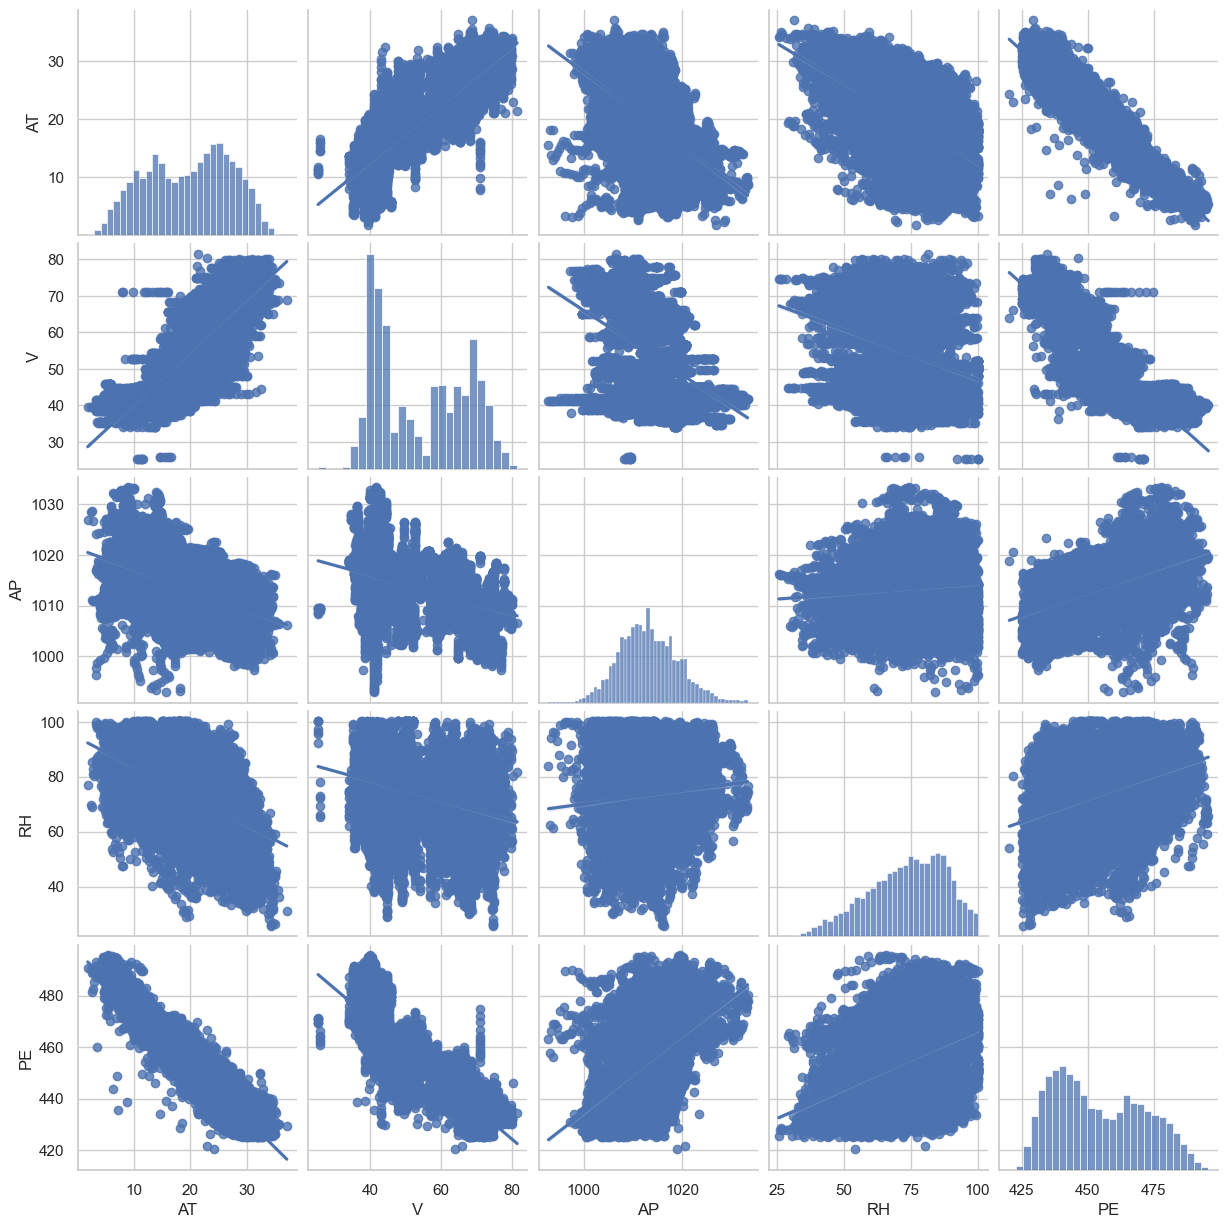

In [ ]:
sns.pairplot(df,kind = 'reg');

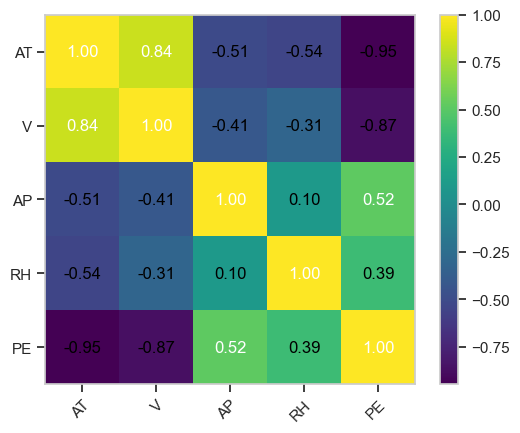

In [ ]:
cm = np.corrcoef(df.values.T)
hm = heatmap(cm,row_names = df.columns, 
            column_names = df.columns)
# plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [ ]:
# features and target
x = df.drop('PE',axis=1)
y = df['PE']

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=300, shuffle=True)


# scaling. 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
m_scaler=MinMaxScaler()
s_scaler = StandardScaler()
m_scaler.fit(x_train)
s_scaler.fit(x_train)
# standard scaled
xs_train = s_scaler.transform(x_train)
xs_test = s_scaler.transform(x_test)

# Decision treee regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
from sklearn.metrics import mean_absolute_error ,mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error 

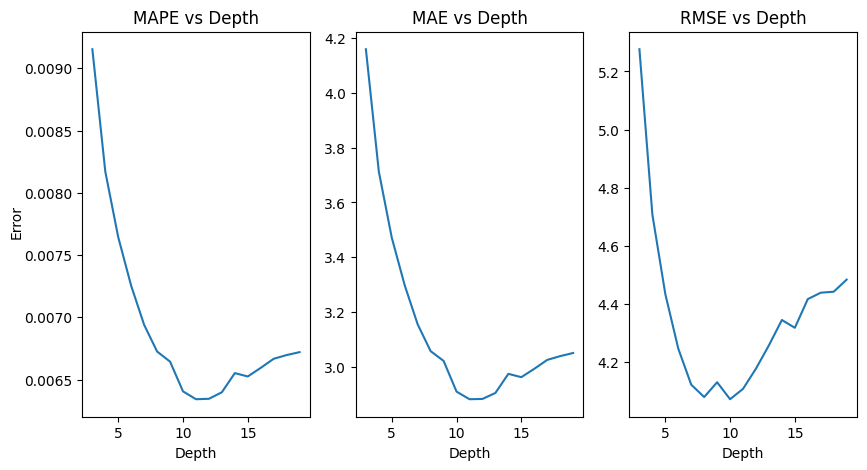

In [ ]:
# model
from sklearn.neural_network import MLPRegressor

depth = np.arange(3,20,1)

MAPE = []
MAE = []
RMSE = []

MAPE = []
MAE = []
RMSE = []

for i in depth:
    dtr = DecisionTreeRegressor(max_depth=i)
    LL_dt = dtr.fit(x_train,y_train)
    ytest_pred = LL_dt.predict(x_test)
    mean_abs_per_err = mean_absolute_percentage_error(y_test,ytest_pred)
    mean_abs_err = mean_absolute_error(y_test,ytest_pred)
    rmse = np.sqrt(mean_squared_error(y_test,ytest_pred))
    MAPE.append(mean_abs_per_err)
    MAE.append(mean_abs_err)
    RMSE.append(rmse)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
# Add a common y-axis label
fig.text(0.06, 0.5, 'Error', ha='center', va='center', rotation='vertical')

# Plot MAPE values
ax1.plot(depth, MAPE)
ax1.set_xlabel('Depth')

ax1.set_title('MAPE vs Depth')

# Plot MAE values
ax2.plot(depth, MAE)
ax2.set_xlabel('Depth')

ax2.set_title('MAE vs Depth')

# Plot RMSE values
ax3.plot(depth, RMSE)
ax3.set_xlabel('Depth')

ax3.set_title('RMSE vs Depth')

# Display the plot
plt.show()

In [ ]:
dtr_best = DecisionTreeRegressor(max_depth=11)
dtr_best.fit(xs_train,y_train)

DecisionTreeRegressor(max_depth=11)

In [ ]:
def evaluate(model,train_features, train_labels, test_features, test_labels):  #feature -> x and label -> y
    
    
    pred_labels_train = model.predict(train_features)
    mean_abs_per_err_train = mean_absolute_percentage_error(train_labels,pred_labels_train)
    mean_abs_err_train = mean_absolute_error(train_labels,pred_labels_train)
    rmse_train = np.sqrt(mean_squared_error (train_labels,pred_labels_train))

    pred_labels_test = model.predict(test_features)
    mean_abs_per_err_test = mean_absolute_percentage_error(test_labels,pred_labels_test)
    mean_abs_err_test = mean_absolute_error(test_labels,pred_labels_test)
    rmse_test = np.sqrt(mean_squared_error (test_labels,pred_labels_test))

    plt.show()
    fig, ax = plt.subplots(figsize=(10, 5))

    # Train error bars
    train_error_values = [mean_abs_per_err_train, mean_abs_err_train, rmse_train]
    train_metrics = ["MAPE", "MAE", "RMSE"]
    train_pos = np.arange(len(train_metrics))
    ax.bar(train_pos - 0.2, train_error_values, width=0.4, label="Train Errors")
    
    # Add value labels to train error bars
    for i, value in enumerate(train_error_values):
        ax.text(train_pos[i]-0.2, value, f"{value:.3f}", ha="center", va="bottom")
    
    # Test error bars
    test_error_values = [mean_abs_per_err_test, mean_abs_err_test, rmse_test]
    test_metrics = ["MAPE", "MAE", "RMSE"]
    test_pos = np.arange(len(train_metrics))
    ax.bar(test_pos + 0.2, test_error_values, width=0.4, label="Test Errors")
    
    # Add value labels to test error bars
    for i, value in enumerate(test_error_values):
        ax.text(test_pos[i]+0.2, value, f"{value:.3f}", ha="center", va="bottom")
    
    # Set axis labels and legend
    ax.set_xticks(range(len(train_metrics)))
    ax.set_xticklabels(train_metrics)
    ax.set_title("Train and Test Errors")
    ax.set_ylabel("Error Value")
    ax.legend()
    
    plt.show()

   
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
    
    sns.distplot(train_labels, hist=False, color="r", label="Ground Truth",ax=ax1)
    sns.distplot(pred_labels_train, hist=False, color="b", label="Predicted Values" , ax=ax1)
    ax1.set_title('Train Data')
    ax1.legend()
    sns.distplot(test_labels, hist=False, color="r", label="Ground Truth", ax=ax2)
    sns.distplot(pred_labels_test, hist=False, color="b", label="Predicted Values" , ax=ax2)
    ax2.set_title('Test Data')
    ax2.legend()

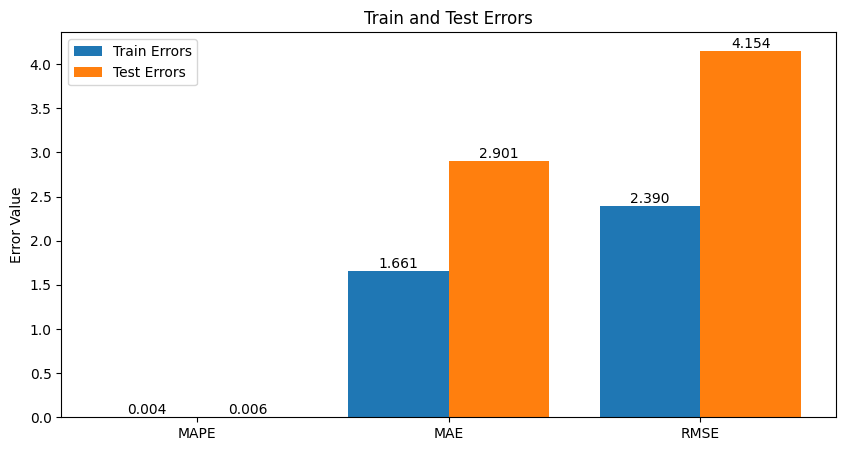

<ipython-input-18-a2b10497f325>:49: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_labels, hist=False, color="r", label="Ground Truth",ax=ax1)
<ipython-input-18-a2b10497f325>:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_labels_train, hist=False, color="b", label=

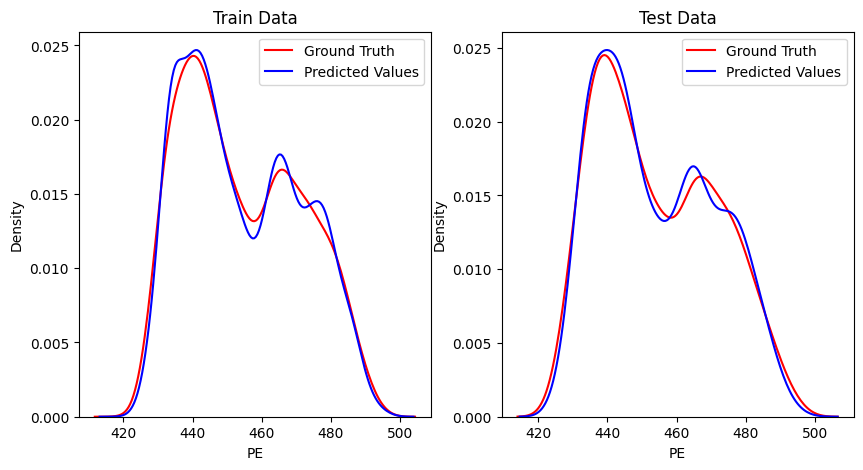

In [ ]:
evaluate(dtr_best,xs_train,y_train,xs_test,y_test)

In [ ]:
# model evaluation at depth 10
dtr_new = DecisionTreeRegressor(max_depth=10)
def evaluate(model, test_features, test_labels):
    from sklearn.metrics import mean_absolute_error,mean_squared_error
    from sklearn.metrics import mean_absolute_percentage_error as mape
    pred_labels = model.predict(test_features)
    mean_abs_per_err = mape(test_labels,pred_labels)
    mean_abs_err = mean_absolute_error(test_labels,pred_labels)
    rmse = np.sqrt(mean_squared_error(test_labels,pred_labels))
    print('MAPE = ',mean_abs_per_err)
    print('MAE = ',mean_abs_err)
    print('RMSE = ',rmse)

In [ ]:
evaluate(dtr,x_test,y_test)

MAPE =  0.00675186525396983
MAE =  3.0638310877193153
RMSE =  4.500094390048578
